In [50]:
from counters import *
import random 
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,9)


In [51]:
counterClasses = [Counter, MorrisCounter, MorrisAlpha, RedisCounter]


In [52]:
def run(counterClass, kwargs, times, N):
    res = []
    for _ in range(times):
        counter = counterClass(**kwargs)
        for _ in range(N):
            counter.update()
        res.append(counter.query())
    return np.array(res)
    

In [53]:
vals1 = run(MorrisAlpha, {'a':.01, 'bits':16}, 100, 10000)
u = np.mean(vals1)
u

10016.739600491177

In [54]:
np.mean((9000 <= vals1) & (11000 >= vals1))

0.85

In [55]:
vals2 = run(MorrisAlpha, {'a':.05, 'bits':16}, 100, 10000)
vals3 = run(MorrisAlpha, {'a':.001, 'bits':16}, 100, 10000)
vals4 = run(MorrisAlpha, {'a':1, 'bits':16}, 100, 10000)

np.mean(vals2), np.mean(vals3), np.mean(vals4)

(10418.653237344906, 10006.563166450831, 10259.48)

In [56]:
def plotMorrisAlpha(alphas, bits, N, times, bins):
    for alpha in alphas:
        vals = run(MorrisAlpha, {'a':alpha, 'bits':bits}, times, N)
        plt.hist(vals, bins, alpha=.5, label='a='+str(alpha))
    plt.ylabel("Count")
    plt.xlabel("Average Counter Value after " + str(N) + " updates")

    plt.legend()
    
    plt.title("Morris Counter Value for " + str(N) + " Updates and " + str(times) + " Iterations for Varying Alpha Values and " + str(bits) + " Bits")
    plt.savefig("MorrisAlpha" + "_" + str(bits) + "_" + str(times) + "_" + str(N) + "_" + str(max(bins)) + ".png")
    plt.show()



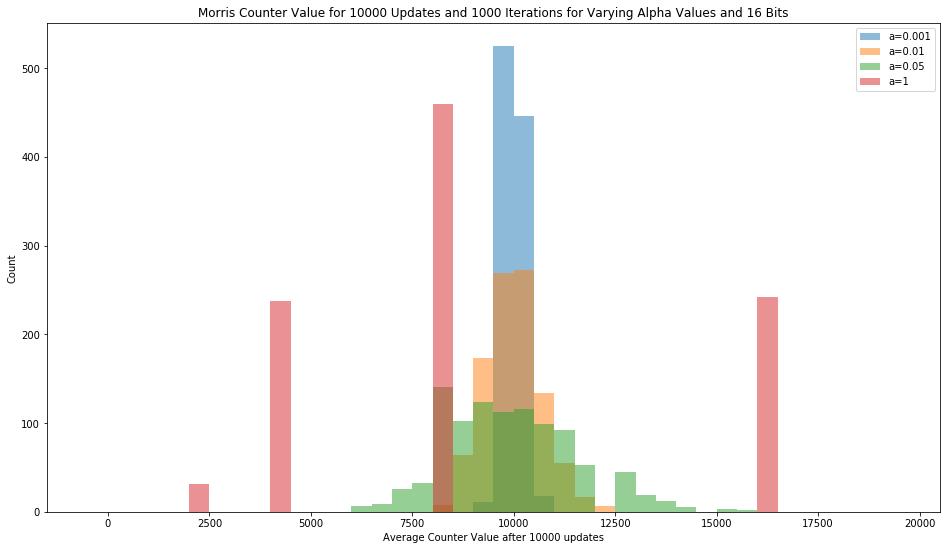

In [57]:
plotMorrisAlpha(alphas=[.001, .01, .05, 1], bits=16, N=10000, times=1000, bins=np.linspace(0, 20000, 41) - 500)


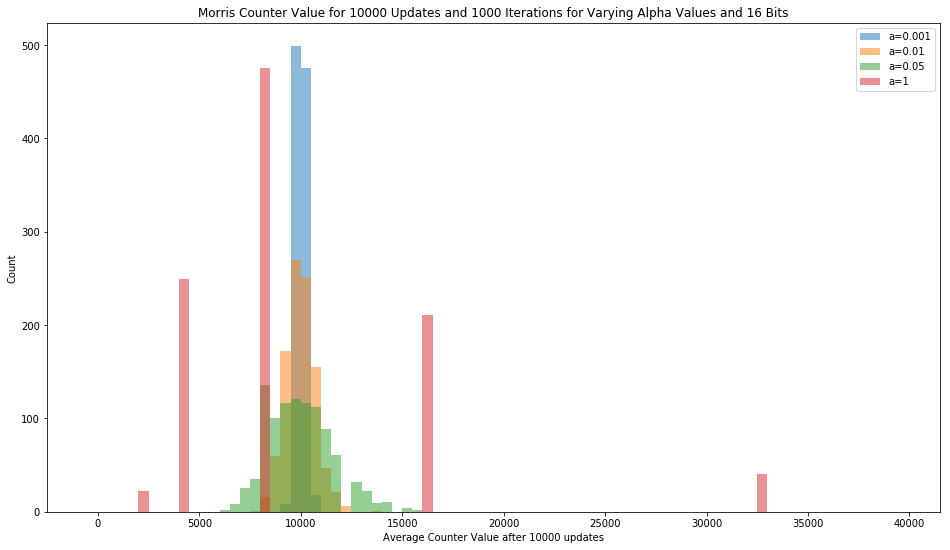

In [58]:
plotMorrisAlpha(alphas=[.001, .01, .05, 1], bits=16, N=10000, times=1000, bins=np.linspace(0, 40000, 81) - 500)


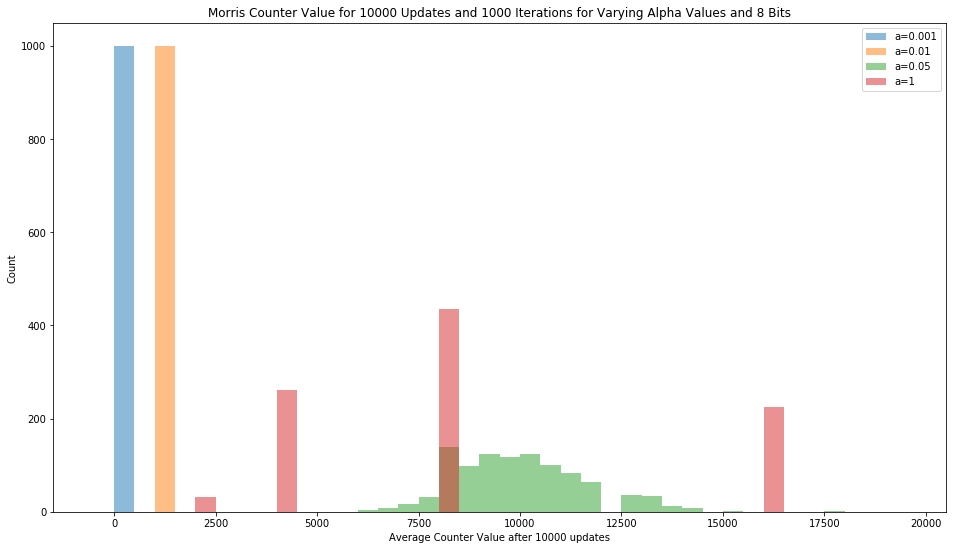

In [59]:
plotMorrisAlpha(alphas=[.001, .01, .05, 1], bits=8, N=10000, times=1000, bins=np.linspace(0, 20000, 41) - 500)

In [60]:
def queryMorrisAlpha(a, X):
    return int(1/a * (((1 + a) ** X) - 1))

In [61]:
queryMorrisAlpha(.001, 255), queryMorrisAlpha(.01, 255), queryMorrisAlpha(.05, 255), queryMorrisAlpha(1, 255)

(290,
 1164,
 5061736,
 57896044618658097711785492504343953926634992332820282019728792003956564819968)

In [62]:
def plotRedisCounter(alphas, bits, N, times, bins):
    for alpha in alphas:
        vals = run(RedisCounter, {'a':alpha, 'bits':bits}, times, N)
        plt.hist(vals, bins, alpha=.5, label='a='+str(alpha))
    plt.ylabel("Count")
    plt.xlabel("Average Counter Value after " + str(N) + " updates")

    plt.legend()
    
    plt.title("Redis Counter Value for " + str(N) + " Updates and " + str(times) + " Iterations for Varying Alpha Values and " + str(bits) + " Bits")
    plt.savefig("RedisCounter" + "_" + str(bits) + "_" + str(times) + "_" + str(N) + "_" + str(max(bins)) + ".png")

    plt.show()



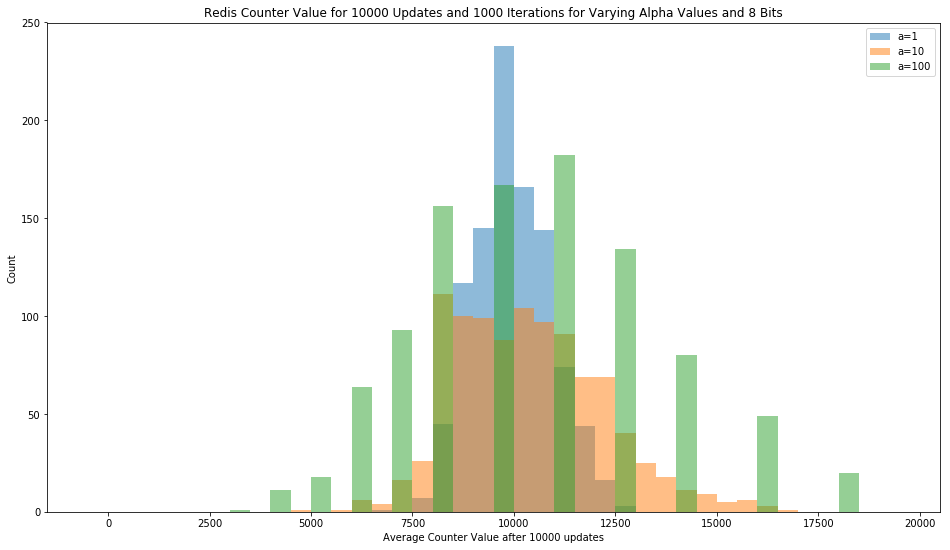

In [63]:
plotRedisCounter(alphas=[1, 10, 100], bits=8, N=10000, times=1000, bins=np.linspace(0, 20000, 41) - 500)

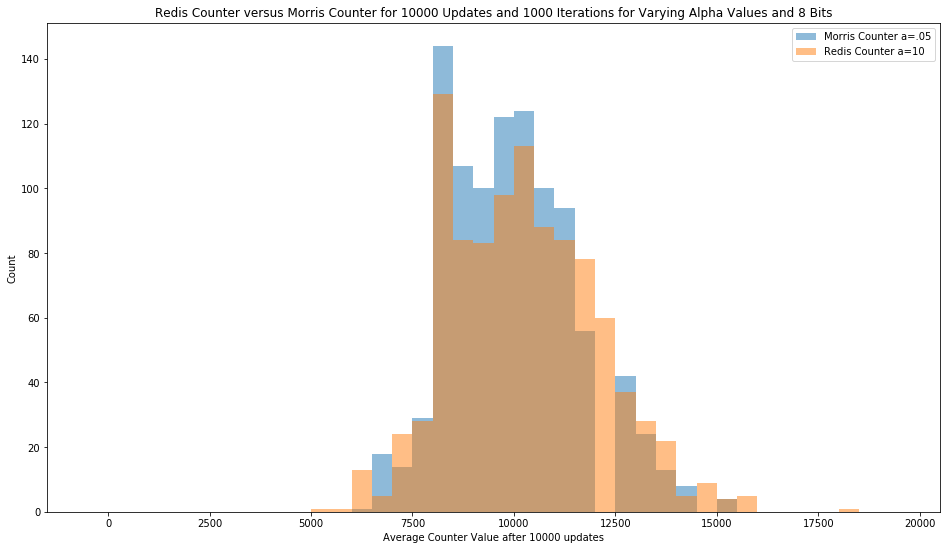

In [64]:
times, N, bits = 1000, 10000, 8
bins=np.linspace(0, 20000, 41) - 500
vals1 = run(MorrisAlpha, {'a':.05, 'bits':bits}, times, N)
vals2 = run(RedisCounter, {'a':10, 'bits':bits}, times, N)
plt.hist(vals1, bins, alpha=.5, label='Morris Counter a=.05')
plt.hist(vals2, bins, alpha=.5, label='Redis Counter a=10')
plt.ylabel("Count")
plt.xlabel("Average Counter Value after " + str(N) + " updates")

plt.legend()

plt.title("Redis Counter versus Morris Counter for " + str(N) + " Updates and " + str(times) + " Iterations for Varying Alpha Values and " + str(bits) + " Bits")
plt.savefig("RedisMorris" + "_" + str(bits) + "_" + str(times) + "_" + str(N) + "_" + str(max(bins)) + ".png")

plt.show()


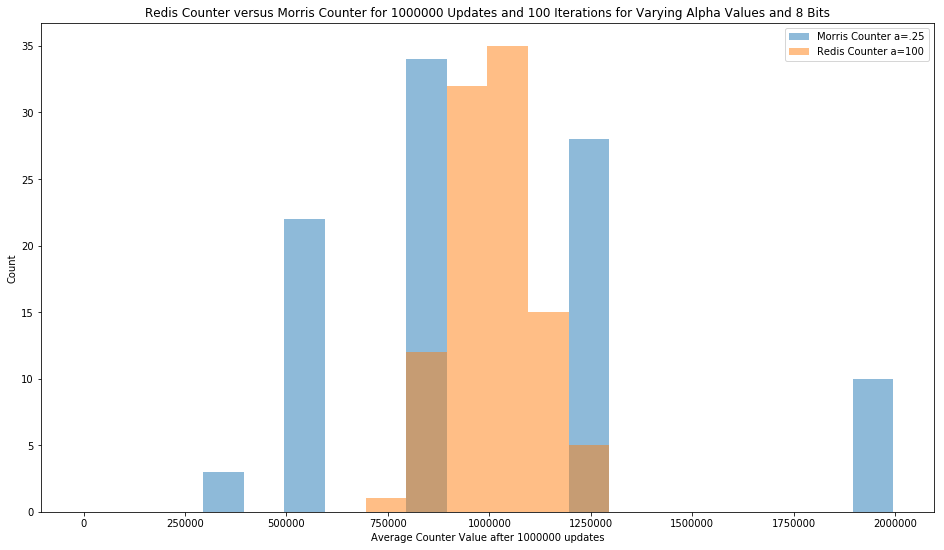

In [67]:
times, N, bits = 100, 1000000, 8
bins=np.linspace(0, 2000000, 21) - 5000
vals1 = run(MorrisAlpha, {'a':.5, 'bits':bits}, times, N)
vals2 = run(RedisCounter, {'a':100, 'bits':bits}, times, N)
plt.hist(vals1, bins, alpha=.5, label='Morris Counter a=.5')
plt.hist(vals2, bins, alpha=.5, label='Redis Counter a=100')
plt.ylabel("Count")
plt.xlabel("Average Counter Value after " + str(N) + " updates")

plt.legend()

plt.title("Redis Counter versus Morris Counter for " + str(N) + " Updates and " + str(times) + " Iterations for Varying Alpha Values and " + str(bits) + " Bits")
plt.savefig("RedisMorris" + "_" + str(bits) + "_" + str(times) + "_" + str(N) + "_" + str(max(bins)) + ".png")

plt.show()


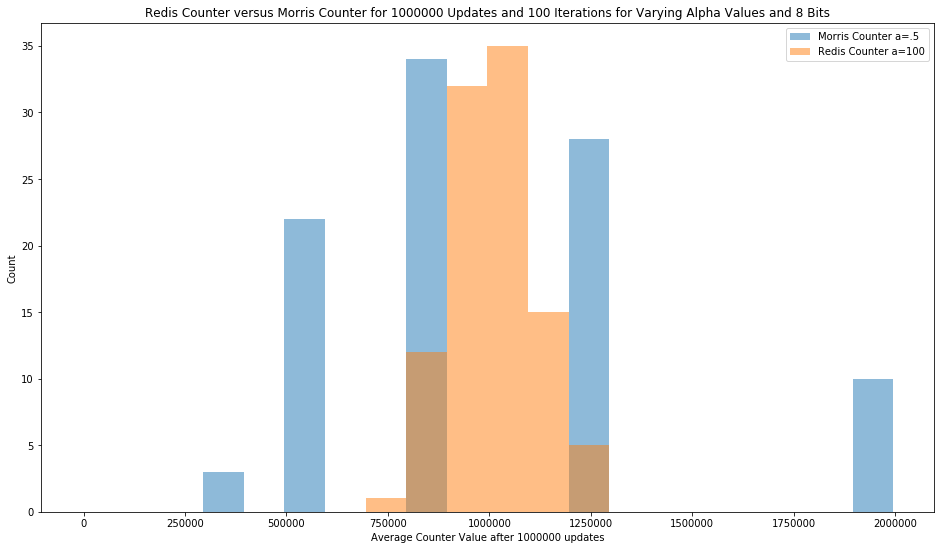

In [68]:
plt.hist(vals1, bins, alpha=.5, label='Morris Counter a=.5')
plt.hist(vals2, bins, alpha=.5, label='Redis Counter a=100')
plt.ylabel("Count")
plt.xlabel("Average Counter Value after " + str(N) + " updates")

plt.legend()

plt.title("Redis Counter versus Morris Counter for " + str(N) + " Updates and " + str(times) + " Iterations for Varying Alpha Values and " + str(bits) + " Bits")
plt.savefig("RedisMorris" + "_" + str(bits) + "_" + str(times) + "_" + str(N) + "_" + str(max(bins)) + ".png")

plt.show()


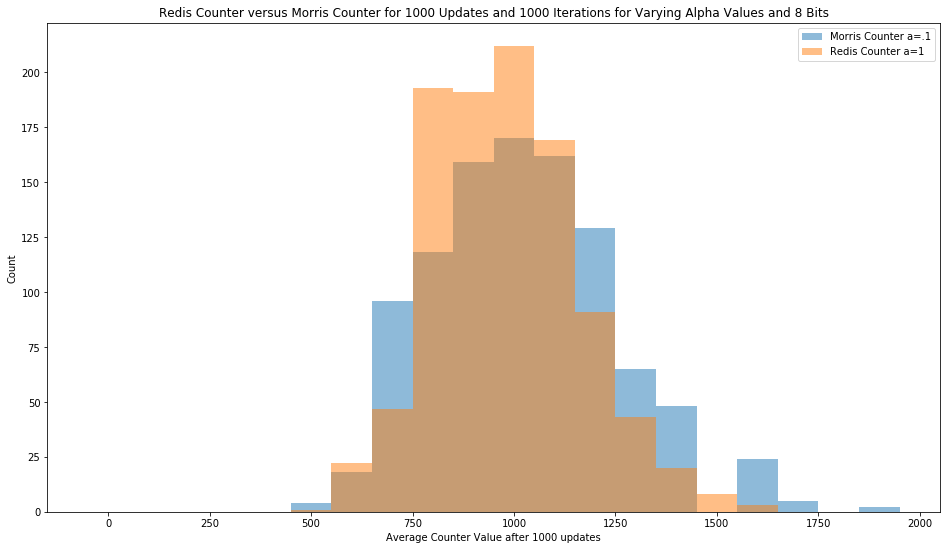

In [66]:
times, N, bits = 1000, 1000, 8
bins=np.linspace(0, 2000, 21) - 50
vals1 = run(MorrisAlpha, {'a':.1, 'bits':bits}, times, N)
vals2 = run(RedisCounter, {'a':1, 'bits':bits}, times, N)
plt.hist(vals1, bins, alpha=.5, label='Morris Counter a=.1')
plt.hist(vals2, bins, alpha=.5, label='Redis Counter a=1')
plt.ylabel("Count")
plt.xlabel("Average Counter Value after " + str(N) + " updates")

plt.legend()

plt.title("Redis Counter versus Morris Counter for " + str(N) + " Updates and " + str(times) + " Iterations for Varying Alpha Values and " + str(bits) + " Bits")
plt.savefig("RedisMorris" + "_" + str(bits) + "_" + str(times) + "_" + str(N) + "_" + str(max(bins)) + ".png")

plt.show()
